# Submission Akhir: Menyelesaikan Permasalahan Institusi Pendidikan

- **Nama:** Nuraisah
- **Email:** nuraisahnura2004@gmail.com
- **ID Dicoding:** nuraisah_oxzV

#Persiapan
Sumber data : https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/main/employee/employee_data.csv

Menyiapkan library yang dibutuhkan

In [62]:
#Import Modul yang akan digunakan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
import joblib
from sklearn.model_selection import GridSearchCV
from google.colab import files

Menyiapkan data yang akan digunakan

In [63]:
uploaded = files.upload()

Saving data.csv to data (2).csv


In [64]:
df = pd.read_csv('data.csv', delimiter=';')

In [65]:
# Melihat 5 data teratas
df.head(5)

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


#Data Understanding

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

In [67]:
print('total duplikasi data pada df:',df.duplicated().sum())

total duplikasi data pada df: 0


In [68]:
null_counts = df.isnull().sum()
print(null_counts)

Marital_status                                  0
Application_mode                                0
Application_order                               0
Course                                          0
Daytime_evening_attendance                      0
Previous_qualification                          0
Previous_qualification_grade                    0
Nacionality                                     0
Mothers_qualification                           0
Fathers_qualification                           0
Mothers_occupation                              0
Fathers_occupation                              0
Admission_grade                                 0
Displaced                                       0
Educational_special_needs                       0
Debtor                                          0
Tuition_fees_up_to_date                         0
Gender                                          0
Scholarship_holder                              0
Age_at_enrollment                               0


In [69]:
#Menghitung jumlah kolom numerikal
num_cols = df.select_dtypes(include=['int64','float64']).columns
num_count = len(num_cols)

#Menghitung jumlah kolom kategorikal
cat_col = df.select_dtypes(include=['object','category']).columns
cat_count = len(cat_col)

print(f"Jumlah kolom numerikal: {num_count}")
print(f"Jumlah kolom kategorikal: {cat_count}")

Jumlah kolom numerikal: 36
Jumlah kolom kategorikal: 1


In [70]:
print(num_cols)

Index(['Marital_status', 'Application_mode', 'Application_order', 'Course',
       'Daytime_evening_attendance', 'Previous_qualification',
       'Previous_qualification_grade', 'Nacionality', 'Mothers_qualification',
       'Fathers_qualification', 'Mothers_occupation', 'Fathers_occupation',
       'Admission_grade', 'Displaced', 'Educational_special_needs', 'Debtor',
       'Tuition_fees_up_to_date', 'Gender', 'Scholarship_holder',
       'Age_at_enrollment', 'International',
       'Curricular_units_1st_sem_credited',
       'Curricular_units_1st_sem_enrolled',
       'Curricular_units_1st_sem_evaluations',
       'Curricular_units_1st_sem_approved', 'Curricular_units_1st_sem_grade',
       'Curricular_units_1st_sem_without_evaluations',
       'Curricular_units_2nd_sem_credited',
       'Curricular_units_2nd_sem_enrolled',
       'Curricular_units_2nd_sem_evaluations',
       'Curricular_units_2nd_sem_approved', 'Curricular_units_2nd_sem_grade',
       'Curricular_units_2nd_sem_wit

In [71]:
cat_col

Index(['Status'], dtype='object')

In [72]:
# Melihat bentuk data
df.shape

(4424, 37)

In [73]:
# Melihat statistik deskriptif data
df.describe()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


# Analysis Univariate Variable

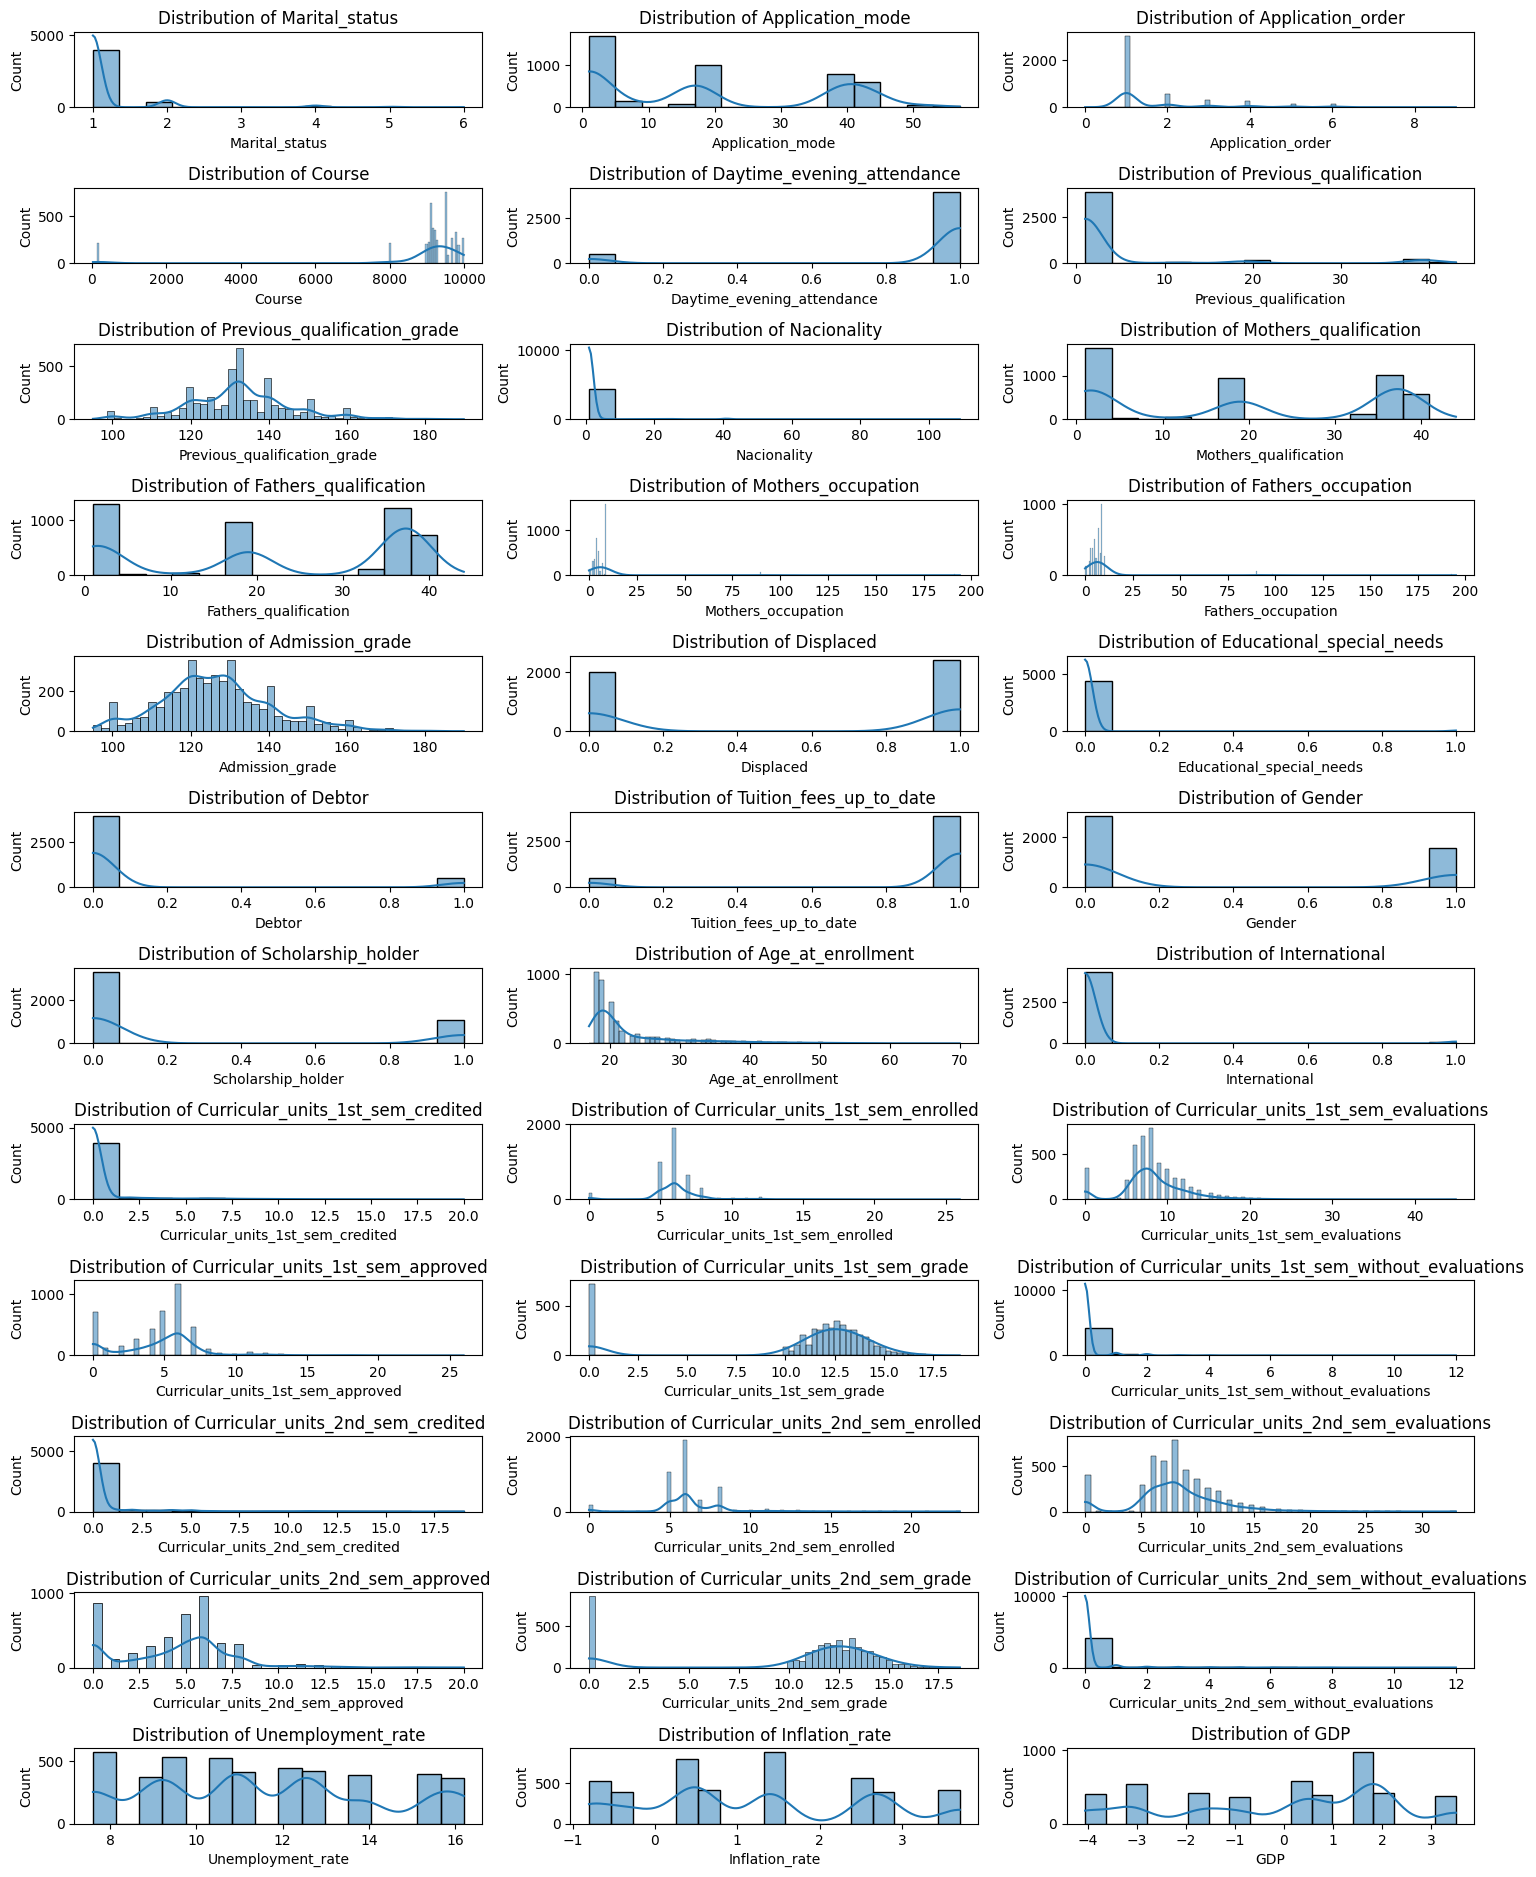

In [74]:
# Univariate analysis untuk numerical variables
plt.figure(figsize=(15, 20))
for i, col in enumerate(num_cols, 1):
    plt.subplot(len(num_cols) // 3 + 1, 3, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

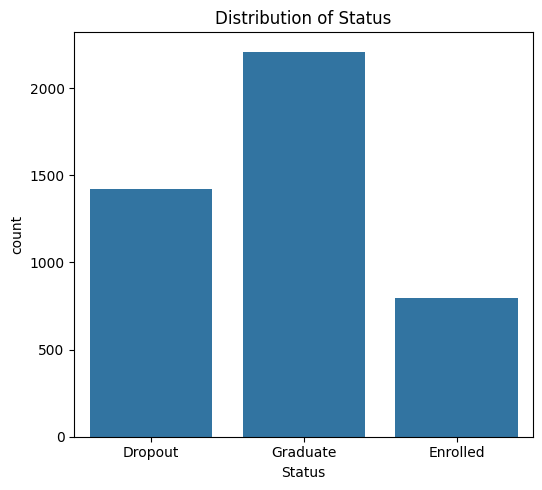

In [75]:
# Univariate analysis untuk categorical variables
plt.figure(figsize=(15, 5))
for i, col in enumerate(cat_col, 1):
    plt.subplot(len(cat_col) // 3 + 1, 3, i)
    sns.countplot(data=df, x=col)
    plt.title(f'Distribution of {col}')
    plt.xticks()
plt.tight_layout()
plt.show()

In [76]:
df_multi =pd.DataFrame(df.copy())
df_multi.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [77]:
status_drop = df_multi[df_multi['Status'] == 'Dropout']
status_drop.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.0,0,10.8,1.4,1.74,Dropout
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.0,0,10.8,1.4,1.74,Dropout
7,1,18,4,9254,1,1,119.0,1,37,37,...,0,5,5,0,0.0,0,15.5,2.8,-4.06,Dropout
9,1,1,1,9238,1,1,138.0,1,1,19,...,0,6,14,2,13.5,0,8.9,1.4,3.51,Dropout
12,1,1,2,9853,1,1,133.0,1,19,37,...,0,6,0,0,0.0,0,12.7,3.7,-1.70,Dropout


In [78]:
#Martial Status pada siswa Dropout
martial_status = status_drop['Marital_status'].value_counts()
marital_status_percent = status_drop['Marital_status'].value_counts(normalize=True) * 100

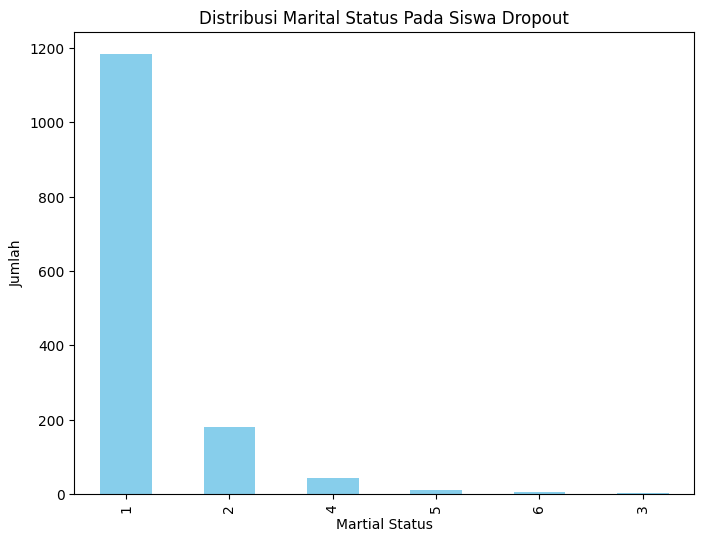

In [79]:
plt.figure(figsize=(8, 6))
martial_status.plot(kind='bar', color='skyblue')
plt.title('Distribusi Marital Status Pada Siswa Dropout')
plt.xlabel('Martial Status')
plt.ylabel('Jumlah')
plt.show()

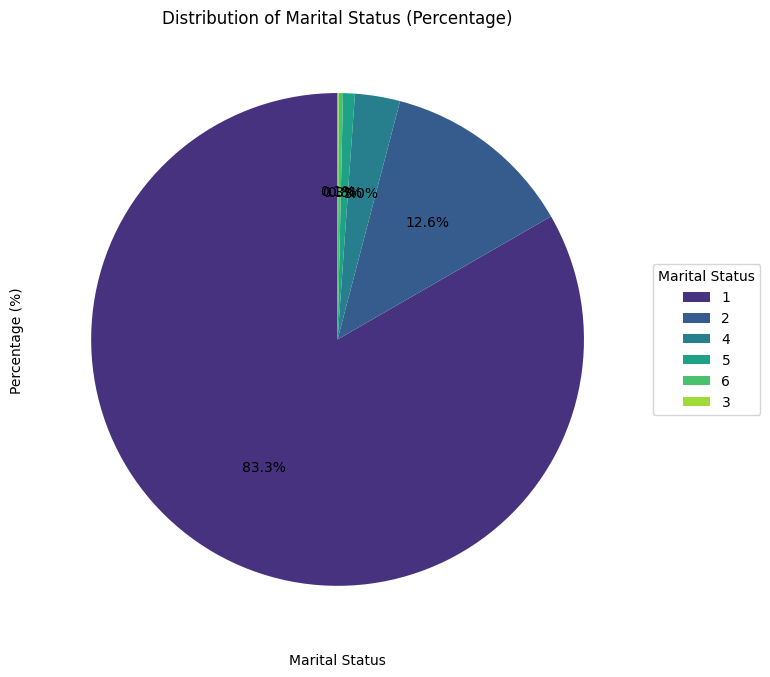

In [80]:
plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(
    marital_status_percent,
    labels=None,  # Labels akan ditampilkan di legend
    autopct='%1.1f%%',
    startangle=90,
    colors=sns.color_palette('viridis', len(marital_status_percent))
)
# Menambahkan judul dan label
plt.title('Distribution of Marital Status (Percentage)')
plt.legend(wedges, marital_status_percent.index, title="Marital Status", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.xlabel('Marital Status')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45)
plt.show()

In [81]:
# Helper function untuk mengganti nilai numerik dengan label deskriptif
def replace_values(column, replacement_dict):
    return df_multi[column].replace(replacement_dict)

# Daftar kolom yang memerlukan konversi dan dictionary untuk mengganti nilainya
replacement_mappings = {
    'Marital_status': {
        1: 'Single',
        2: 'Married',
        3: 'Widower',
        4: 'Divorced',
        5: 'Facto Union',
        6: 'Legally Separated'
    },
    'Course': {
        33: 'Biofuel Production Technologies',
        171: 'Animation and Multimedia Design',
        8014: 'Social Service (evening attendance)',
        9003: 'Agronomy',
        9070: 'Communication Design',
        9085: 'Veterinary Nursing',
        9119: 'Informatics Engineering',
        9130: 'Equinculture',
        9147: 'Management',
        9238: 'Social Service',
        9254: 'Tourism',
        9500: 'Nursing',
        9556: 'Oral Hygiene',
        9670: 'Advertising and Marketing Management',
        9773: 'Journalism and Communication',
        9853: 'Basic Education',
        9991: 'Management (evening attendance)'
    },
    'Nacionality': {
        1: 'Portuguese', 2: 'German', 6: 'Spanish', 11: 'Italian', 13: 'Dutch',
        14: 'English', 17: 'Lithuanian', 21: 'Angolan', 22: 'Cape Verdean',
        24: 'Guinean', 25: 'Mozambican', 26: 'Santomean', 32: 'Turkish',
        41: 'Brazilian', 62: 'Romanian', 100: 'Moldova (Republic of)',
        101: 'Mexican', 103: 'Ukrainian', 105: 'Russian', 108: 'Cuban',
        109: 'Colombian'
    },
    'Mothers_qualification': {
        1: 'Secondary Education - 12th Year of Schooling or Eq.',
        2: 'Higher Education - Bachelor\'s Degree',
        3: 'Higher Education - Degree',
        4: 'Higher Education - Master\'s',
        5: 'Higher Education - Doctorate',
        6: 'Frequency of Higher Education',
        9: '12th Year of Schooling - Not Completed',
        10: '11th Year of Schooling - Not Completed',
        11: '7th Year (Old)',
        12: 'Other - 11th Year of Schooling',
        14: '10th Year of Schooling',
        18: 'General commerce course',
        19: 'Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv.',
        22: 'Technical-professional course',
        26: '7th year of schooling',
        27: '2nd cycle of the general high school course',
        29: '9th Year of Schooling - Not Completed',
        30: '8th year of schooling',
        34: 'Unknown',
        35: 'Can\'t read or write',
        36: 'Can read without having a 4th year of schooling',
        37: 'Basic education 1st cycle (4th/5th year) or equiv.',
        38: 'Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv.',
        39: 'Technological specialization course',
        40: 'Higher education - degree (1st cycle)',
        41: 'Specialized higher studies course',
        42: 'Professional higher technical course',
        43: 'Higher Education - Master (2nd cycle)',
        44: 'Higher Education - Doctorate (3rd cycle)'
    },
    'Mothers_occupation': {
        0: 'Student', 1: 'Legislative Power and Executive Bodies',
        2: 'Specialists in Intellectual and Scientific Activities',
        3: 'Intermediate Level Technicians and Professions',
        4: 'Administrative staff',
        5: 'Personal Services, Security and Safety Workers and Sellers',
        6: 'Farmers and Skilled Workers in Agriculture, Fisheries and Forestry',
        7: 'Skilled Workers in Industry, Construction and Craftsmen',
        8: 'Installation and Machine Operators and Assembly Workers',
        9: 'Unskilled Workers',
        10: 'Armed Forces Professions',
        90: 'Other Situation',
        99: '(blank)',
        122: 'Health professionals',
        123: 'Teachers',
        125: 'Specialists in ICT',
        131: 'Intermediate level science and engineering technicians',
        132: 'Intermediate level technicians of health',
        134: 'Intermediate level technicians from legal, social, sports, cultural and similar services',
        141: 'Office workers, secretaries and data processing operators',
        143: 'Data, accounting, statistical, financial services and registry-related operators',
        144: 'Other administrative support staff',
        151: 'Personal service workers',
        152: 'Sellers',
        153: 'Personal care workers and the like',
        171: 'Skilled construction workers, except electricians',
        173: 'Skilled workers in printing, precision instrument manufacturing, jewelers, artisans',
        175: 'Workers in food processing, woodworking, clothing and other industries',
        191: 'Cleaning workers',
        192: 'Unskilled workers in agriculture, animal production, fisheries and forestry',
        193: 'Unskilled workers in extractive industry, construction, manufacturing and transport',
        194: 'Meal preparation assistants'
    },
    'Fathers_qualification': {
        1: 'Secondary Education - 12th Year of Schooling or Eq.',
        2: 'Higher Education - Bachelor\'s Degree',
        3: 'Higher Education - Degree',
        4: 'Higher Education - Master\'s',
        5: 'Higher Education - Doctorate',
        6: 'Frequency of Higher Education',
        9: '12th Year of Schooling - Not Completed',
        10: '11th Year of Schooling - Not Completed',
        11: '7th Year (Old)',
        12: 'Other - 11th Year of Schooling',
        13: '2nd year complementary high school course',
        14: '10th Year of Schooling',
        18: 'General commerce course',
        19: 'Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv.',
        20: 'Complementary High School Course',
        22: 'Technical-professional course',
        25: 'Complementary High School Course - not concluded',
        26: '7th year of schooling',
        27: '2nd cycle of the general high school course',
        29: '9th Year of Schooling - Not Completed',
        30: '8th year of schooling',
        31: 'General Course of Administration and Commerce',
        33: 'Supplementary Accounting and Administration',
        34: 'Unknown',
        35: 'Can\'t read or write',
        36: 'Can read without having a 4th year of schooling',
        37: 'Basic education 1st cycle (4th/5th year) or equiv.',
        38: 'Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv.',
        39: 'Technological specialization course',
        40: 'Higher education - degree (1st cycle)',
        41: 'Specialized higher studies course',
        42: 'Professional higher technical course',
        43: 'Higher Education - Master (2nd cycle)',
        44: 'Higher Education - Doctorate (3rd cycle)'
    },
    'Fathers_occupation': {
        0: 'Student',
        1: 'Legislative Power and Executive Bodies',
        2: 'Specialists in Intellectual and Scientific Activities',
        3: 'Intermediate Level Technicians and Professions',
        4: 'Administrative staff',
        5: 'Personal Services, Security and Safety Workers and Sellers',
        6: 'Farmers and Skilled Workers in Agriculture, Fisheries and Forestry',
        7: 'Skilled Workers in Industry, Construction and Craftsmen',
        8: 'Installation and Machine Operators and Assembly Workers',
        9: 'Unskilled Workers',
        10: 'Armed Forces Professions',
        90: 'Other Situation',
        99: '(blank)',
        101: 'Armed Forces Officers',
        102: 'Armed Forces Sergeants',
        103: 'Other Armed Forces personnel',
        112: 'Directors of administrative and commercial services',
        114: 'Hotel, catering, trade and other services directors',
        121: 'Specialists in the physical sciences, mathematics, engineering and related techniques',
        122: 'Health professionals',
        123: 'Teachers',
        124: 'Specialists in finance, accounting, administrative organization, public and commercial relations',
        131: 'Intermediate level science and engineering technicians and professions',
        132: 'Intermediate level technicians of health',
        134: 'Intermediate level technicians from legal, social, sports, cultural and similar services',
        135: 'Information and communication technology technicians',
        141: 'Office workers, secretaries in general and data processing operators',
        143: 'Data, accounting, statistical, financial services and registry-related operators',
        144: 'Other administrative support staff',
        151: 'Personal service workers',
        152: 'Sellers',
        153: 'Personal care workers and the like',
        154: 'Protection and security services personnel',
        161: 'Market-oriented farmers and skilled agricultural and animal production workers',
        163: 'Farmers, livestock keepers, fishermen, hunters and gatherers, subsistence',
        171: 'Skilled construction workers and the like, except electricians',
        172: 'Skilled workers in metallurgy, metalworking and similar',
        174: 'Skilled workers in electricity and electronics',
        175: 'Workers in food processing, woodworking, clothing and other industries and crafts',
        181: 'Fixed plant and machine operators',
        182: 'Assembly workers',
        183: 'Vehicle drivers and mobile equipment operators',
        192: 'Unskilled workers in agriculture, animal production, fisheries and forestry',
        193: 'Unskilled workers in extractive industry, construction, manufacturing and transport',
        194: 'Meal preparation assistants',
        195: 'Street vendors (except food) and street service providers'
    },
    'Gender': {
        1: 'Male',
        0: 'Female'
    }
    # ,
    # 'Scholarship_holder': {
    #     1: 'Yes',
    #     0: 'No'
    # },
    # 'International': {
    #     1: 'Yes',
    #     0: 'No'
    # }
}

# Terapkan fungsi replace_values pada kolom-kolom yang relevan
for col, mapping in replacement_mappings.items():
    df_multi[col] = replace_values(col, mapping)

In [82]:
columns_ketegorikal = ['Marital_status', 'Course', 'Nacionality', 'Mothers_qualification',
                       'Fathers_qualification', 'Mothers_occupation', 'Fathers_occupation',
                       'Gender']

def plot_bar_distribution(data, columns, color='blue', figsize=(4, 3)):
    for column in columns:
        value_counts = data[column].value_counts()
        plt.figure(figsize=figsize)
        value_counts.plot(kind='bar', color=color)
        plt.title(f'Distribusi {column} Status Pada Siswa Dropout')
        plt.xlabel(column)
        plt.ylabel('Jumlah')
        plt.show()

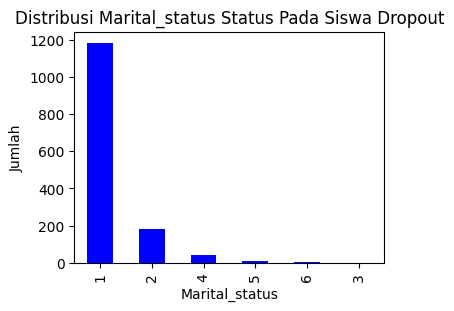

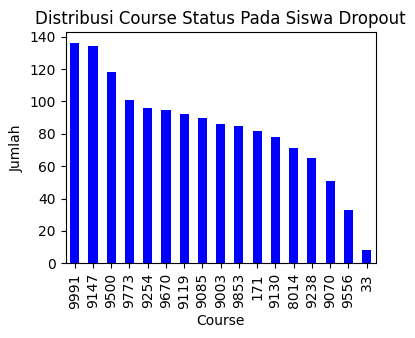

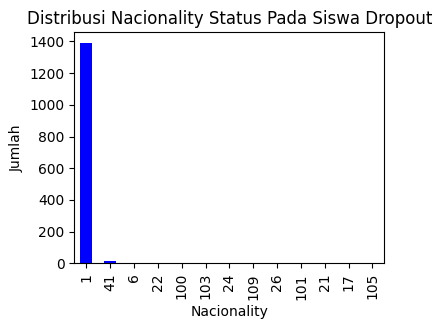

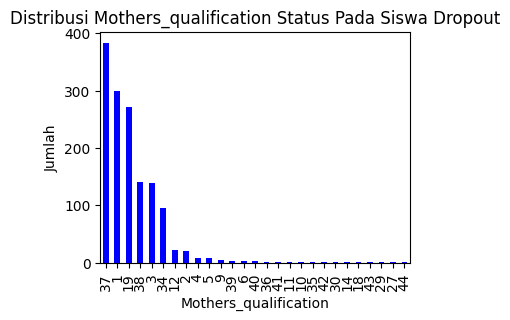

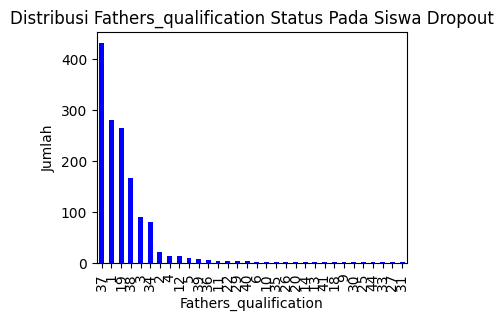

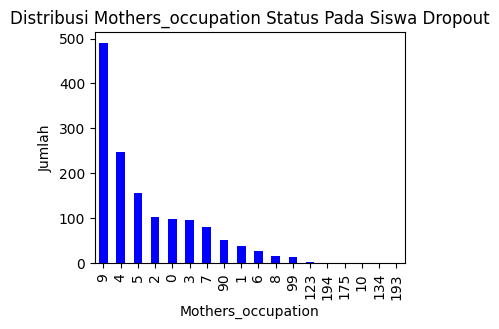

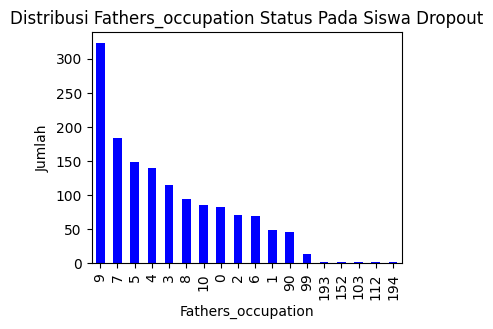

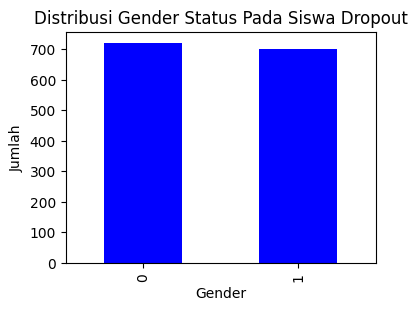

In [83]:
plot_bar_distribution(status_drop, columns_ketegorikal)

Status Dropout dengan Fitur Kategorical

In [84]:
col_kategorikal = ['Displaced','Educational_special_needs','Debtor',
                   'Tuition_fees_up_to_date','Scholarship_holder','International']

In [85]:
def create_value_counts_table(data, columns):
    result_df = pd.DataFrame()  # DataFrame kosong untuk menyimpan hasil

    for column in columns:
        # Menghitung value_counts untuk setiap kolom
        value_counts_df = data[column].value_counts().to_frame(name=f'Jumlah_{column}')
        value_counts_df[column] = value_counts_df.index  # Menyimpan nilai-nilai unik
        value_counts_df.reset_index(drop=True, inplace=True)  # Mereset index
        # Menggabungkan hasil ke DataFrame hasil (result_df)
        result_df = pd.concat([result_df, value_counts_df], axis=1)

    return result_df

In [86]:
value_counts_table = create_value_counts_table(status_drop, col_kategorikal)
value_counts_table

,Jumlah_Displaced,Displaced,Jumlah_Educational_special_needs,Educational_special_needs,Jumlah_Debtor,Debtor,Jumlah_Tuition_fees_up_to_date,Tuition_fees_up_to_date,Jumlah_Scholarship_holder,Scholarship_holder,Jumlah_International,International
0,752,0,1404,0,1109,0,964,1,1287,0,1389,0
1,669,1,17,1,312,1,457,0,134,1,32,1


In [87]:
import matplotlib.pyplot as plt

def plot_pie_distribution(data, columns, figsize=(8, 6), autopct='%1.1f%%', colors=None):
    for column in columns:
        value_counts = data[column].value_counts()
        plt.figure(figsize=figsize)
        plt.pie(value_counts, labels=value_counts.index, autopct=autopct, colors=colors, startangle=90)
        plt.title(f'Presentase Jumlah Siswa Dropout Terhadap {column}')
        plt.axis('equal')  # Agar pie chart menjadi lingkaran
        plt.show()

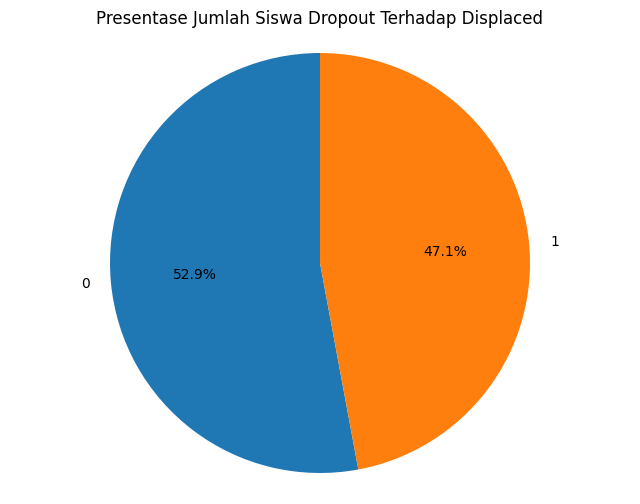

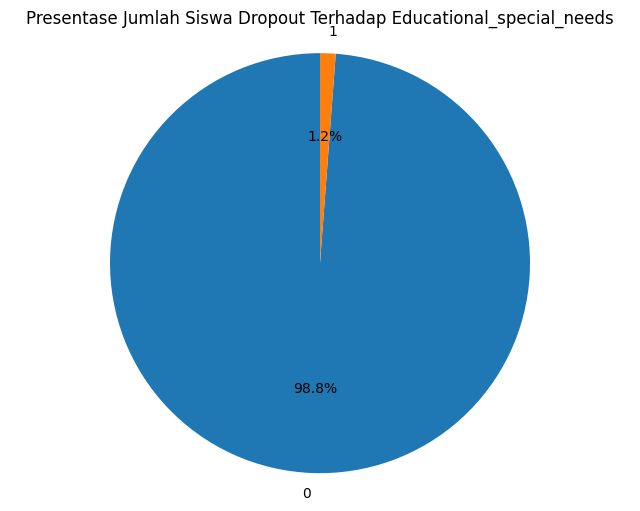

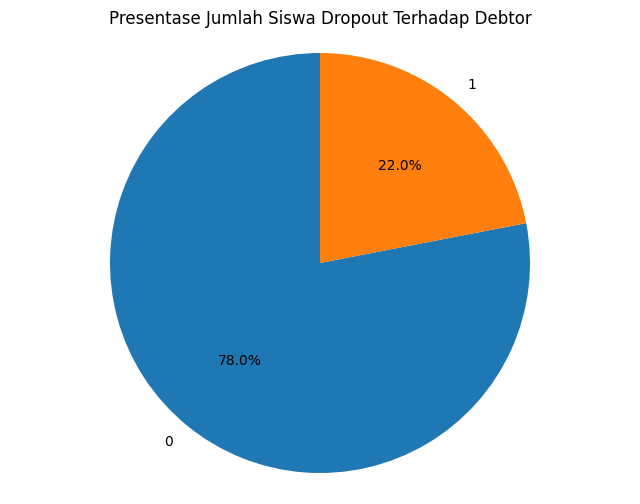

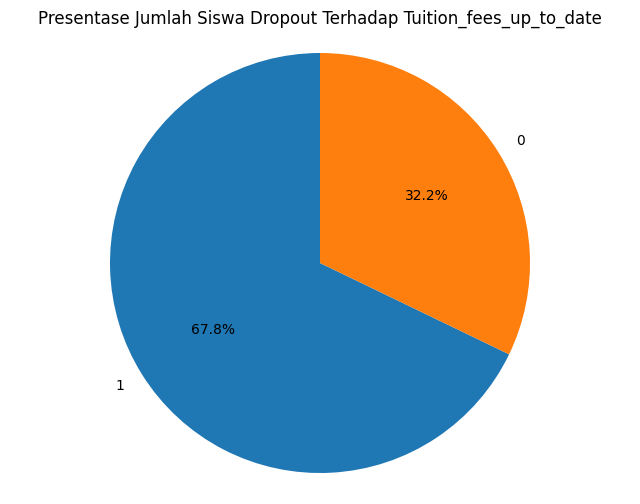

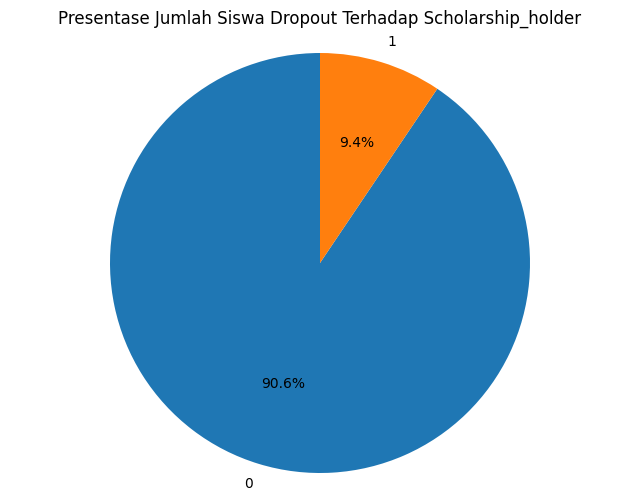

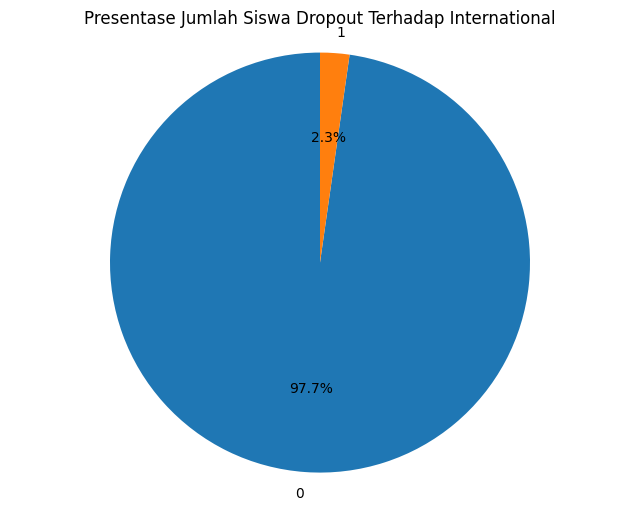

In [88]:
plot_pie_distribution(status_drop,col_kategorikal)

Correlation Matrix

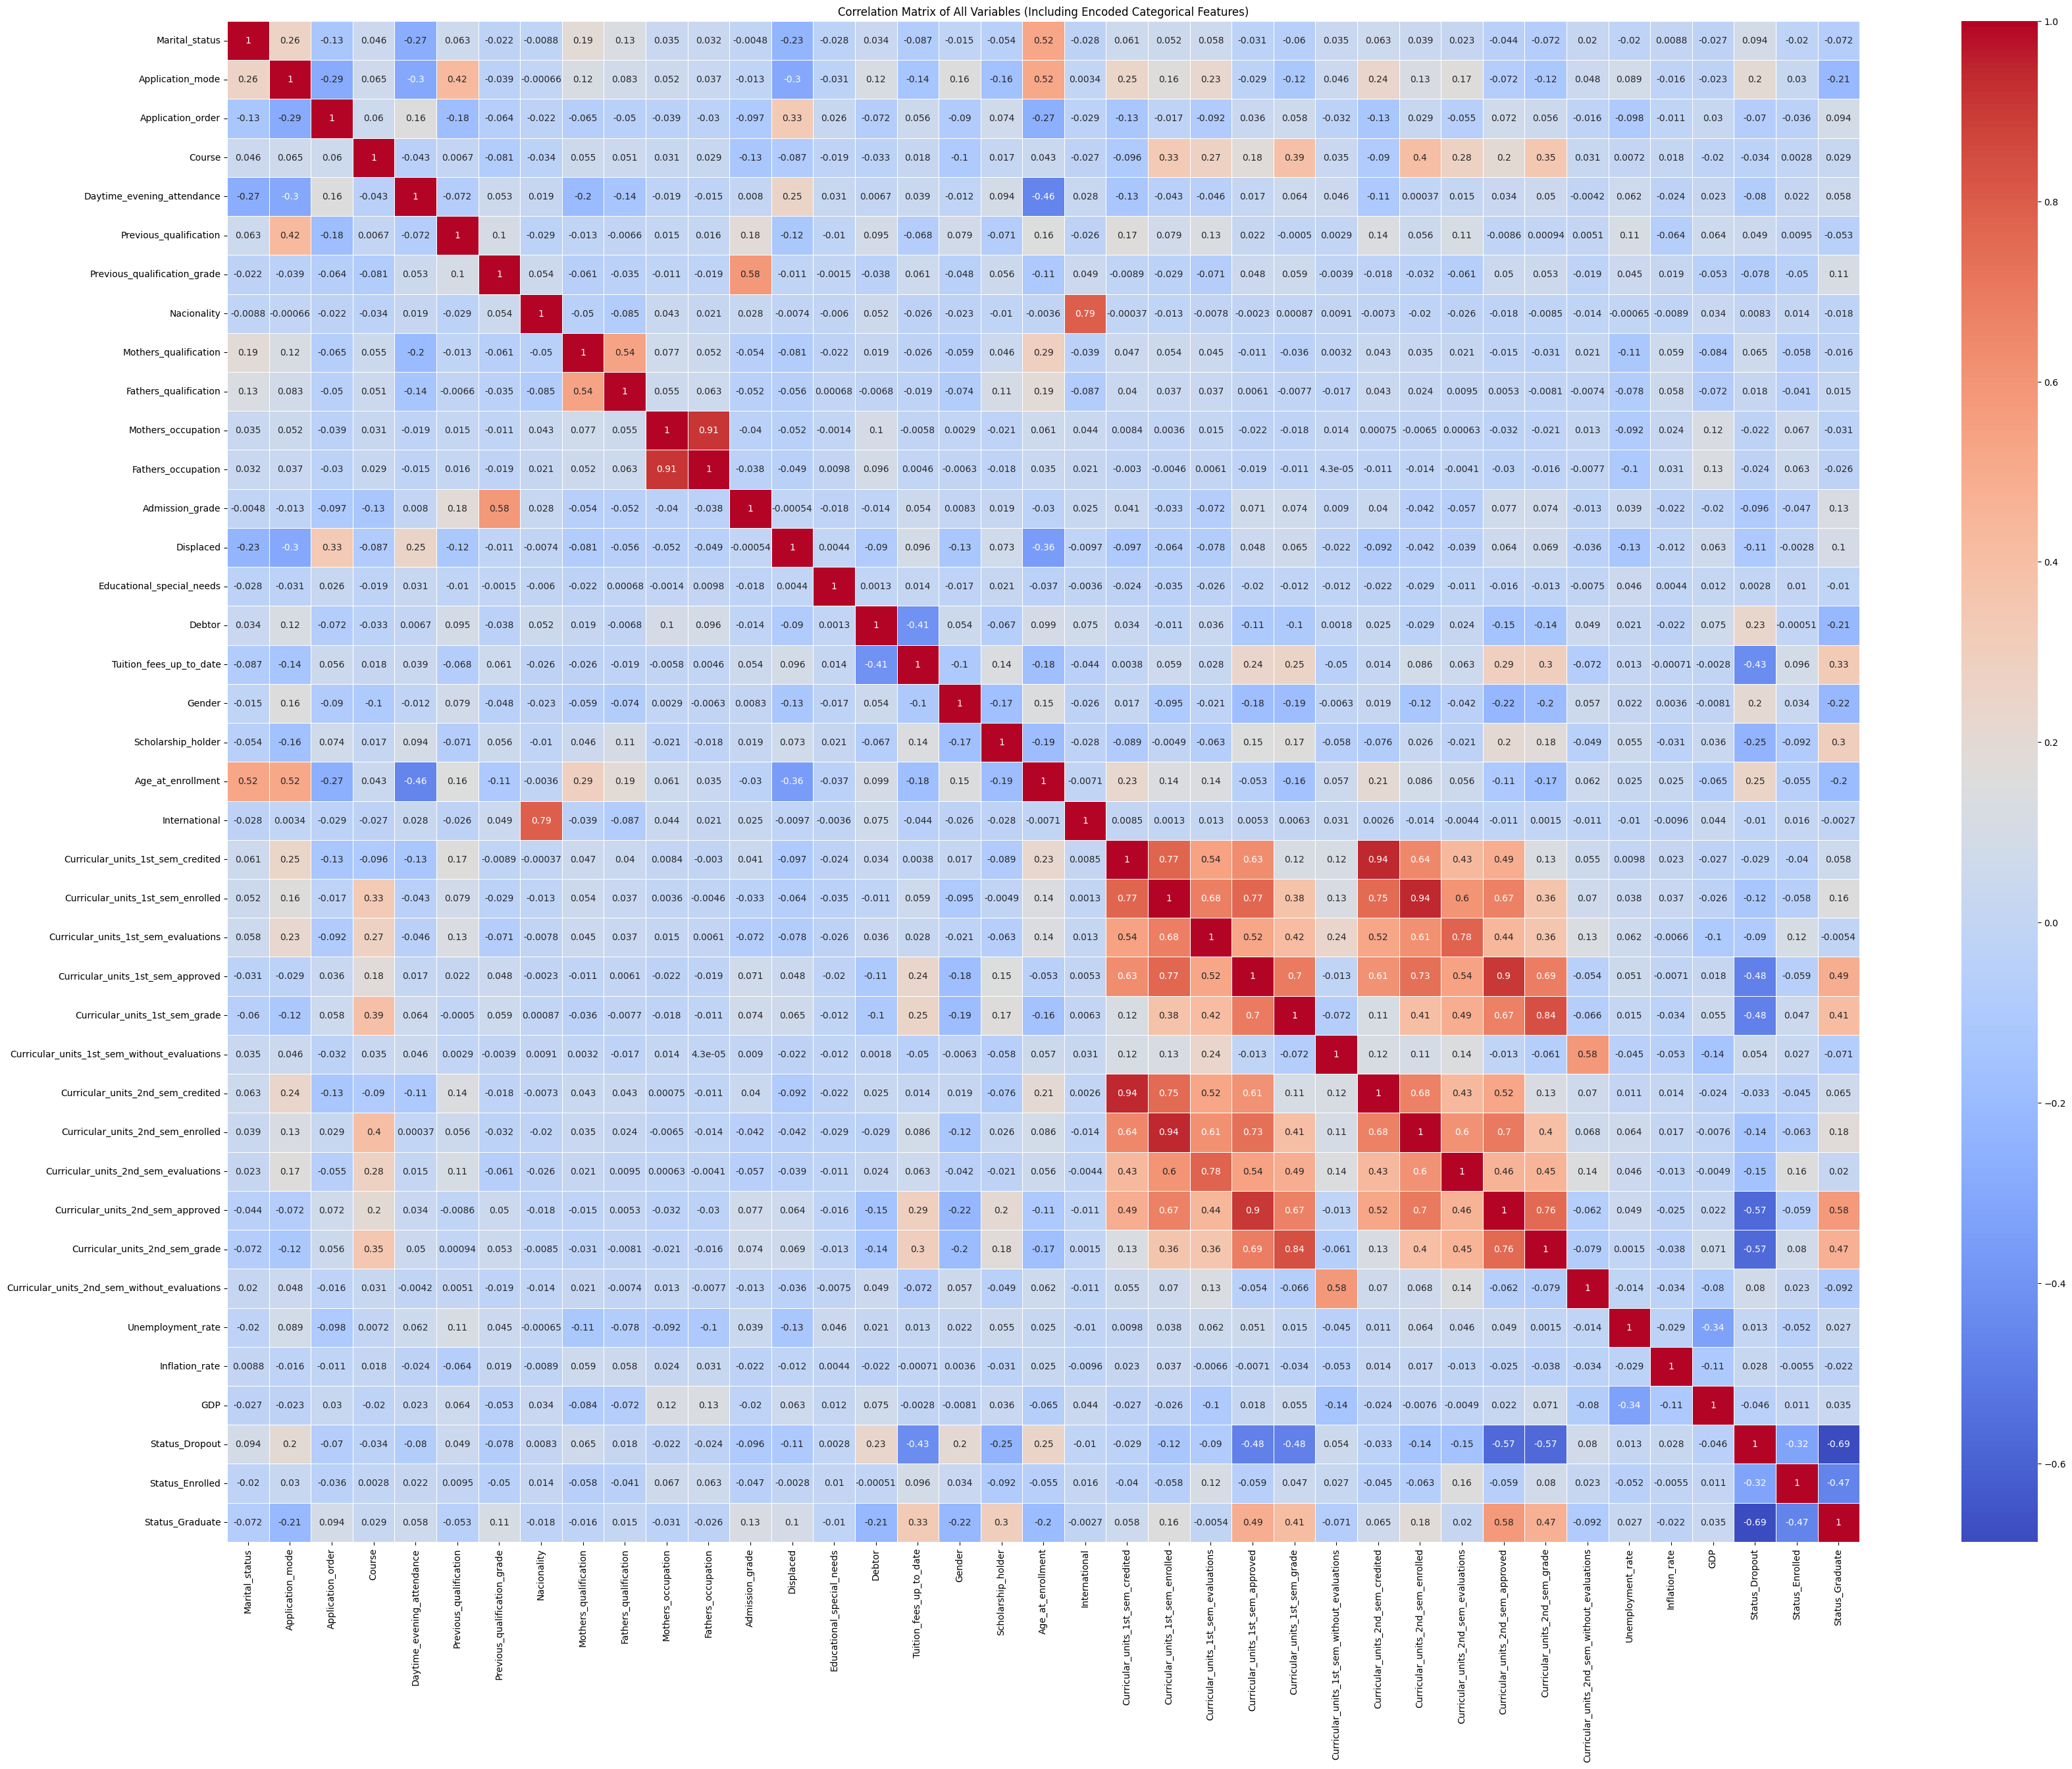

In [89]:
# One-hot encoding untuk fitur kategorikal
df_encoded = pd.get_dummies(df, columns=cat_col, drop_first=False)

# Membuat matriks korelasi untuk seluruh fitur (numerik dan kategorikal yang telah dienkode)
correlation_matrix = df_encoded.corr()

# Plot matriks korelasi
plt.figure(figsize=(40, 30))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of All Variables (Including Encoded Categorical Features)')
plt.show()

<ipython-input-90-006e24187c12>:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_mapping['Status'] = df['Status'].replace(status_mapping)
<ipython-input-90-006e24187c12>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=factors.values[:10], y=factors.index[:10], dodge=False, palette="coolwarm")


Factors correlated with Status:
Curricular_units_2nd_sem_approved               0.624157
Curricular_units_2nd_sem_grade                  0.566827
Curricular_units_1st_sem_approved               0.529123
Curricular_units_1st_sem_grade                  0.485207
Tuition_fees_up_to_date                         0.409827
Scholarship_holder                              0.297595
Curricular_units_2nd_sem_enrolled               0.175847
Curricular_units_1st_sem_enrolled               0.155974
Admission_grade                                 0.120889
Displaced                                       0.113986
Previous_qualification_grade                    0.103764
Curricular_units_2nd_sem_evaluations            0.092721
Application_order                               0.089791
Daytime_evening_attendance                      0.075107
Curricular_units_2nd_sem_credited               0.054004
Curricular_units_1st_sem_credited               0.048150
Curricular_units_1st_sem_evaluations            0.044362

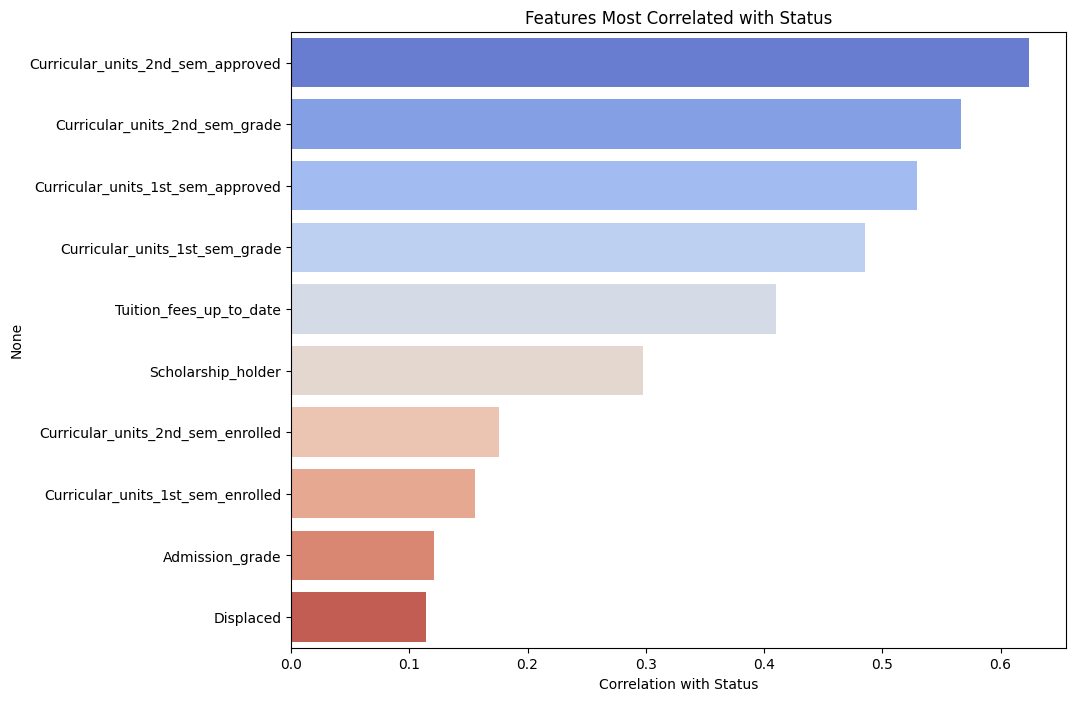

In [90]:
# menampilkan 10 feature yang paling berkorelasi

# Mengubah kolom target 'Status' menjadi numerik
status_mapping = {'Dropout': 0,'Enrolled':1,'Graduate': 2}
df_mapping = df.copy()
df_mapping['Status'] = df['Status'].replace(status_mapping)

# Identifikasi fitur numerik dan kategorikal
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# One-hot encoding untuk fitur kategorikal (kecuali kolom target 'Status')
df_encoded = pd.get_dummies(df_mapping, columns=[col for col in categorical_columns if col != 'Status'], drop_first=True)

# Membuat matriks korelasi untuk seluruh fitur (numerik dan kategorikal yang telah dienkode)
correlation_matrix = df_encoded.corr()

# Ambil korelasi dengan kolom 'Status'
status_correlation = correlation_matrix["Status"].sort_values(ascending=False)

factors = status_correlation
factors = factors.drop('Status')

print("Factors correlated with Status:")
print(factors)

# Plot the top 10 correlations
plt.figure(figsize=(10, 8))
sns.barplot(x=factors.values[:10], y=factors.index[:10], dodge=False, palette="coolwarm")
plt.title("Features Most Correlated with Status")
plt.xlabel("Correlation with Status")
plt.show()

## Data Preparation / Preprocessing

In [91]:
# Melakukan duplikasi dataset
df_cleaned = df.copy()

In [92]:
# Identifikasi fitur numerik dan kategorikal
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

In [93]:
df_scaler = df[['Curricular_units_2nd_sem_approved', 'Curricular_units_2nd_sem_grade', 'Curricular_units_1st_sem_approved', 'Curricular_units_1st_sem_grade', 'Tuition_fees_up_to_date', 'Scholarship_holder', 'Curricular_units_2nd_sem_enrolled', 'Curricular_units_1st_sem_enrolled', 'Admission_grade', 'Displaced']]

In [94]:
# Standardisasi fitur numerik
scaler = StandardScaler()
df_scaler = scaler.fit_transform(df_scaler)

In [95]:
# One-hot encoding untuk fitur kategorikal
df_cleaned = pd.get_dummies(df_cleaned, columns=categorical_columns, drop_first=False)

In [96]:
#Mengubah nilai True dan False menjadi 1 dan 0
df_cleaned = df_cleaned.astype(int)

In [105]:
import os

if os.path.isfile('model'):
    os.remove('model')

# Sekarang buat folder 'model'
os.makedirs('model', exist_ok=True)


In [98]:
# Simpan scaler
joblib.dump(scaler, 'model/scaler.pkl')

['model/scaler.pkl']

## Train Test Split

In [99]:
# Memisahkan fitur (X) dan target (y)
X = df_cleaned.drop(['Status_Dropout','Status_Enrolled','Status_Graduate'], axis=1)
X = X[['Curricular_units_2nd_sem_approved', 'Curricular_units_2nd_sem_grade', 'Curricular_units_1st_sem_approved', 'Curricular_units_1st_sem_grade', 'Tuition_fees_up_to_date', 'Scholarship_holder', 'Curricular_units_2nd_sem_enrolled', 'Curricular_units_1st_sem_enrolled', 'Admission_grade', 'Displaced']]
y = df_cleaned[['Status_Dropout','Status_Enrolled','Status_Graduate']]

# Membagi data menjadi training dan testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Modeling

In [100]:
# Melakukan grid search
rdf_model = RandomForestClassifier(random_state=123)

# Parameter grid
param_grid = {
    'n_estimators': [200, 500],
    'max_features': ['sqrt', 'log2'],
    'max_depth' : [15 ,20],
    'criterion' :['gini', 'entropy']
}

# Grid search
CV_rdf = GridSearchCV(estimator=rdf_model, param_grid=param_grid, cv=5, n_jobs=-1)
CV_rdf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=123),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [15, 20],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [101]:
# Menampilkan best parameter
print("best parameters: ", CV_rdf.best_params_)

best parameters:  {'criterion': 'gini', 'max_depth': 15, 'max_features': 'sqrt', 'n_estimators': 200}


In [102]:
rf_model = RandomForestClassifier(
    criterion='entropy',
    max_depth=15,
    random_state=123,
    max_features='sqrt',
    n_estimators=500,
    n_jobs=-1
)
rf_model.fit(X_train, y_train)

# Menyimpan model
joblib.dump(rf_model, "model/rf_model.joblib")

['model/rf_model.joblib']

## Evaluation

In [103]:
from sklearn.ensemble import RandomForestClassifier

# Inisialisasi model
rdf_model = RandomForestClassifier()

# Latih model
rdf_model.fit(X_train, y_train)

# Prediksi
y_pred = rdf_model.predict(X_test)

In [108]:
# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Classification Report:\n", report)

Accuracy: 69.49%
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.72      0.77       316
           1       0.43      0.27      0.33       151
           2       0.79      0.83      0.81       418

   micro avg       0.76      0.69      0.73       885
   macro avg       0.68      0.61      0.64       885
weighted avg       0.74      0.69      0.71       885
 samples avg       0.69      0.69      0.69       885



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


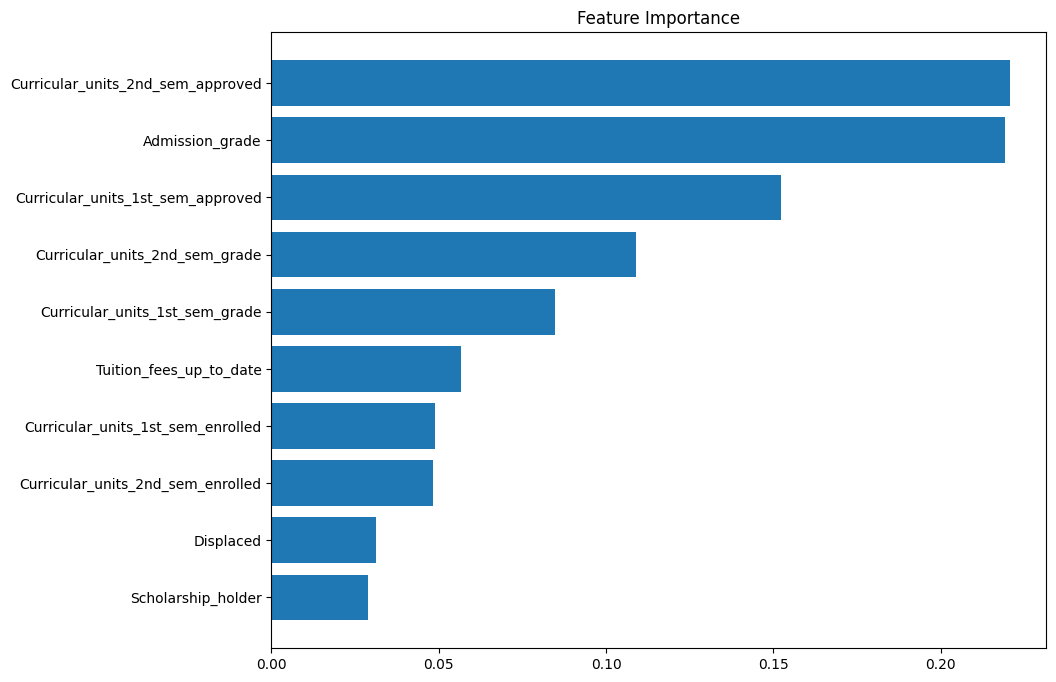

In [104]:
# Plotting fitur penting
importances = rdf_model.feature_importances_
indices = importances.argsort()[::-1]
features = X.columns

plt.figure(figsize=(10, 8))
plt.title("Feature Importance")
plt.barh(range(len(indices)), importances[indices], align="center")
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.gca().invert_yaxis()
plt.show()